In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import os
# isFile = os.path.isfile(path)

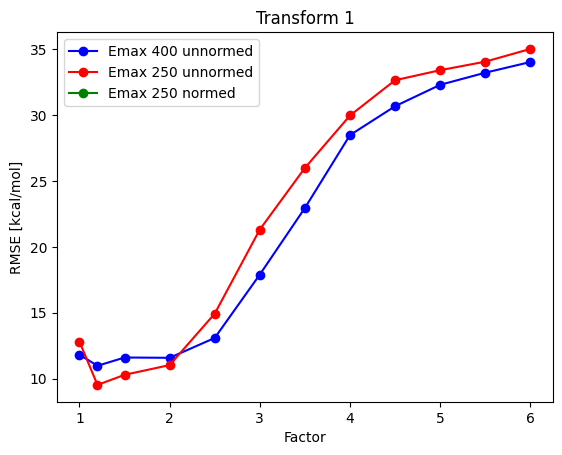

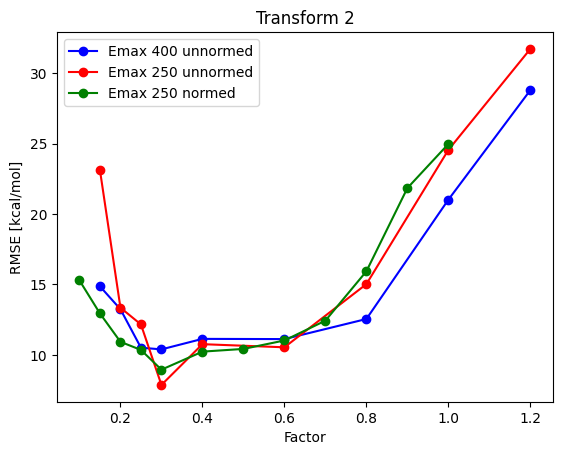

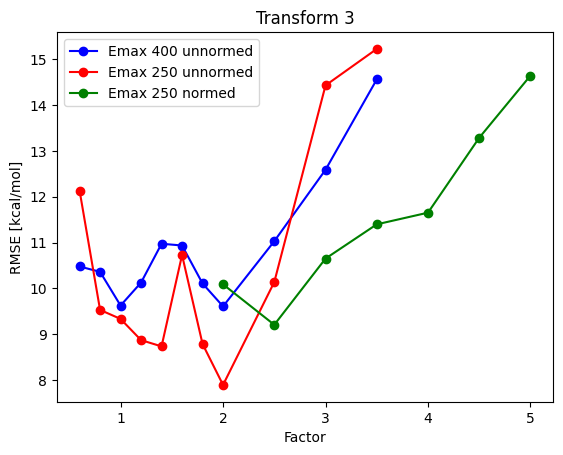

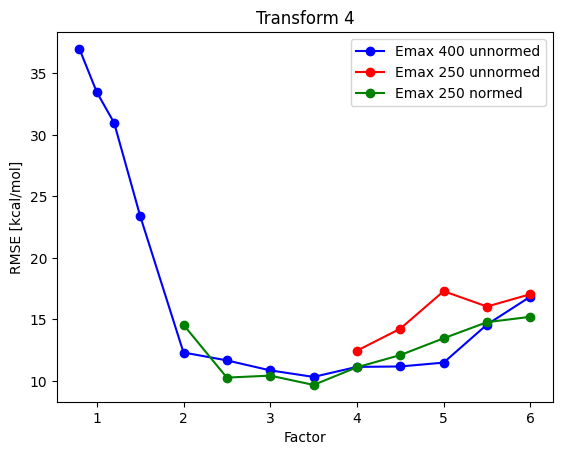

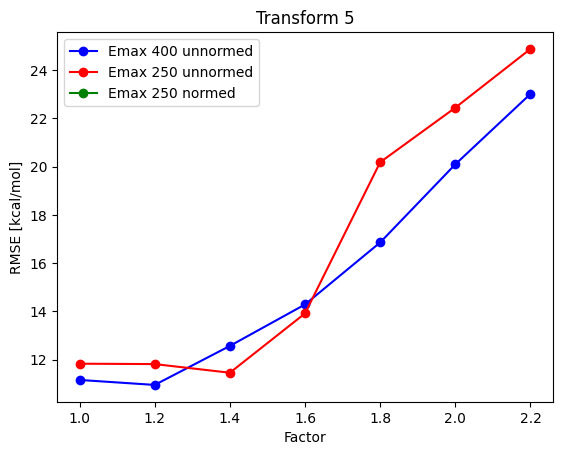

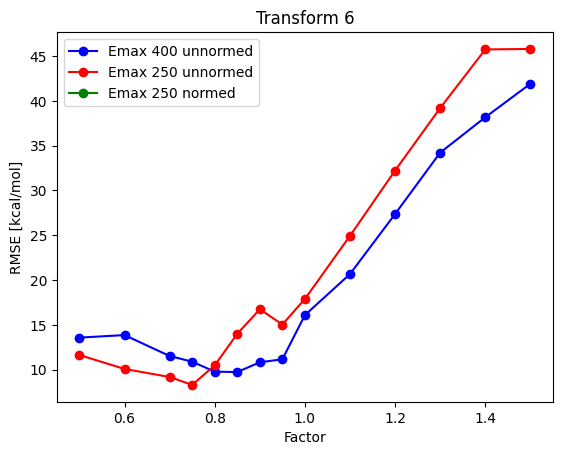

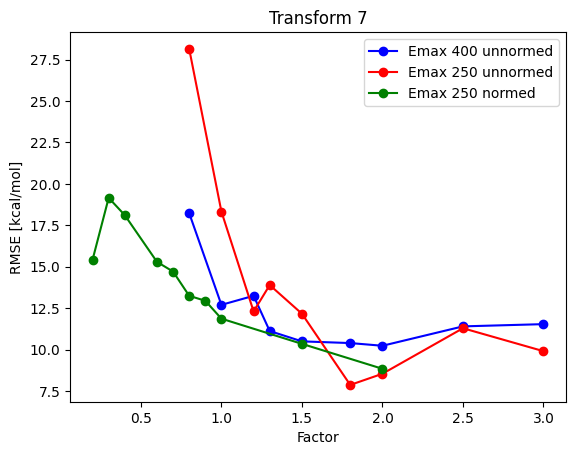

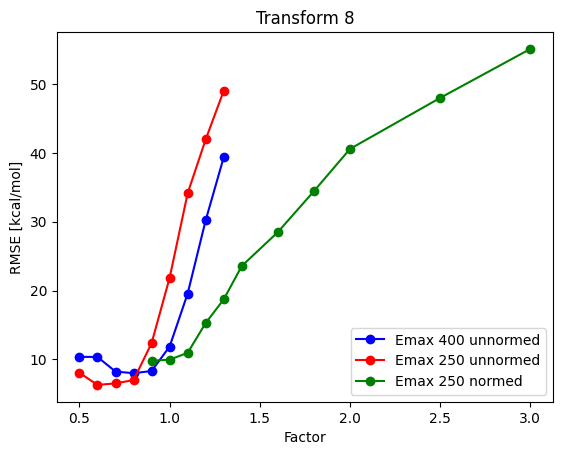

In [2]:
# This notebook...
Path_E400 = '/home/ach/radial-physics_new/radial-physics/output/dataset_comp_new_calcs' # E = 400 unnormed (normed performed worse, see other notebook)
Path_E250 = '/home/ach/radial-physics_new/radial-physics/output/emax2_250' # E = 250 normed and unnormed

no_of_tr = [1,2,3,4,5,6,7,8]
minimia_all_tr_ch4_E400_unnormed = []
minimia_all_tr_ch4_E250_unnormed = []
minimia_all_tr_ch4_E250_normed = []



for i in no_of_tr:

    factor_ch4_E400_unnormed = [] #Methane
    rmse_ch4_E400_unnormed = []
    data_ch4_E400_unnormed = open(Path_E400+f'/Data_TR{i}_random-ch4-10k','r')
    
    factor_ch4_E250_unnormed = [] #Methane
    rmse_ch4_E250_unnormed = []
    data_ch4_E250_unnormed = open(Path_E250+f'/Data_TR{i}_random-ch4-10k','r')

    factor_ch4_E250_normed = [] #Methane
    rmse_ch4_E250_normed = []
    data_ch4_E250_normed = open(Path_E250+f'/Data_TR{i}000_random-ch4-10k','r')
    
    for row in data_ch4_E400_unnormed: #Methane
        row = row.split(' ')
        factor_ch4_E400_unnormed.append(float(row[0]))
        rmse_ch4_E400_unnormed.append(float(row[1]))

    for row in data_ch4_E250_unnormed: #Methane
        row = row.split(' ')
        factor_ch4_E250_unnormed.append(float(row[0]))
        rmse_ch4_E250_unnormed.append(float(row[1]))
    
    for row in data_ch4_E250_normed: #Methane
        row = row.split(' ')
        factor_ch4_E250_normed.append(float(row[0]))
        rmse_ch4_E250_normed.append(float(row[1]))
    
    # print('factors: ', factor_ch4)
    # print('rmse: ', rmse_ch4)
        
    #indices of minima and minima (for plot later)
    minimum_indx_ch4_E400_unnormed = np.argmin(rmse_ch4_E400_unnormed,axis=0)
    minimum_indx_ch4_E250_unnormed = np.argmin(rmse_ch4_E250_unnormed,axis=0)
    minimum_indx_ch4_E250_normed = np.argmin(rmse_ch4_E250_normed,axis=0)

    
    minimia_all_tr_ch4_E400_unnormed.append(rmse_ch4_E400_unnormed[minimum_indx_ch4_E400_unnormed])
    minimia_all_tr_ch4_E250_unnormed.append(rmse_ch4_E250_unnormed[minimum_indx_ch4_E250_unnormed])
    minimia_all_tr_ch4_E250_normed.append(rmse_ch4_E250_normed[minimum_indx_ch4_E250_normed])


    plt.plot(factor_ch4_E400_unnormed, rmse_ch4_E400_unnormed , "b-o", label="Emax 400 unnormed")
    plt.plot(factor_ch4_E250_unnormed, rmse_ch4_E250_unnormed, "r-o", label="Emax 250 unnormed")
    plt.plot(factor_ch4_E250_normed, rmse_ch4_E250_normed, "g-o", label="Emax 250 normed")
    plt.xlabel("Factor")
    plt.ylabel("RMSE [kcal/mol]")
    plt.title(f"Transform {i}")
    # plt.legend(bbox_to_anchor=(1, 1.), ncol=5)
    plt.legend()
    plt.show()
    

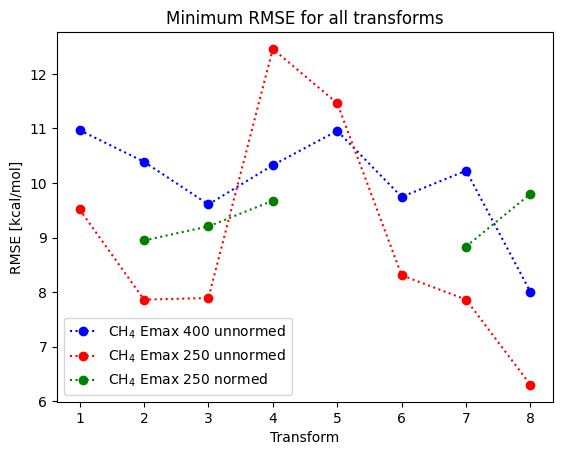

In [3]:
### one plot for each data set with all minima:

plt.plot(no_of_tr, minimia_all_tr_ch4_E400_unnormed, "b:o", label="CH$_{4}$ Emax 400 unnormed")
plt.plot(no_of_tr, minimia_all_tr_ch4_E250_unnormed, "r:o", label="CH$_{4}$ Emax 250 unnormed")
plt.plot(no_of_tr, minimia_all_tr_ch4_E250_normed, "g:o", label="CH$_{4}$ Emax 250 normed")
plt.xlabel("Transform")
plt.ylabel("RMSE [kcal/mol]")
plt.title("Minimum RMSE for all transforms")
plt.legend()
plt.show()


### how can Emax=400 curve be above Emax=250???